In [1]:
#import statements 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans,AgglomerativeClustering

### Importing Data into Pandas Data Frame for Exploratory Analysis

In [55]:
#loading file to pandas dataframe
retail_landing_df = pd.read_excel('Online_Retail.xlsx')
print("File converted to dataframe")

File converted to dataframe


### Exploratory Analysis Of Data Set

In [3]:
# printing structure of dataframe 
print(retail_landing_df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [4]:
# getting summary statistics for numeric columns
print(retail_landing_df.describe())
print("\n")
print("\n")
print(retail_landing_df[['UnitPrice']].describe())
print("\n")
print("\n")
print(retail_landing_df[['Quantity']].describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000




           UnitPrice
count  541909.000000
mean        4.611114
std        96.759853
min    -11062.060000
25%         1.250000
50%         2.080000
75%         4.130000
max     38970.000000




            Quantity
count  541909.000000
mean        9.552250
std       218.081158
min    -80995.000000
25%         1.000000
50%         3.000000
75%        10.000000
max     80995.000000


In [52]:
# computing new columns. Total price is equal to unit price * quantity 
# will be used later to compute avg price vs avg quantity 

retail_landing_df['TotalPrice'] = retail_landing_df['Quantity'] * retail_landing_df['UnitPrice']
print(retail_landing_df.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


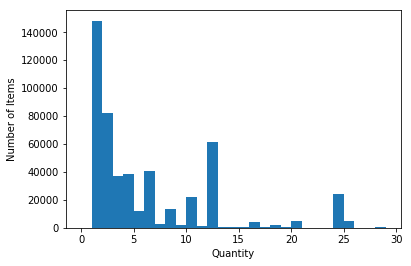

Top 10 Items Most by Quantity


StockCode                         Description  Quantity
   84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
  85099B             JUMBO BAG RED RETROSPOT     47363
   84879       ASSORTED COLOUR BIRD ORNAMENT     36381
   22197                      POPCORN HOLDER     36334
   21212     PACK OF 72 RETROSPOT CAKE CASES     36039
  85123A  WHITE HANGING HEART T-LIGHT HOLDER     35025
   23084                  RABBIT NIGHT LIGHT     30680
   22492             MINI PAINT SET VINTAGE      26437
   22616          PACK OF 12 LONDON TISSUES      26315
   21977  PACK OF 60 PINK PAISLEY CAKE CASES     24753




10 Items Least Purchased by Quantity


StockCode                   Description  Quantity
   23005  printing smudges/thrown away    -19200
   23003  Printing smudges/thrown away     -9058
  72140F                    throw away     -5368
  79323W        Unsaleable, destroyed.     -4830
   20713  wrongly marked. 23343 in box     -3100
   84598                

In [54]:
#1 Identify clusters of purchased items by quantity (E.g.: at least 10, 25 etc.; or buckets i.e.
#  0-20, 20-40, 40-60 etc.)

#Preparing dataframe for question 1 
q1_quant_data = retail_landing_df[['StockCode','Quantity','Description']]

# Finding out the quantity vs number of items which fall in that category
q1_quant_data_agg = q1_quant_data.groupby(['StockCode','Description']).sum().reset_index()
q1_quant_data_agg_quants = list(q1_quant_data['Quantity'])
q1_quant_data_agg_scode = list(q1_quant_data['StockCode'])


# top 10 items 
# Purpose : To get top 10 Items by quantity
# Input : A dataframe consisiting of two columns , Stock Code and Quantity
# Ouptut: Top 10 products by quantity 

def getTop10ByQuantity(df, ascending=True):
    q1_quant_data_agg_topk = df.sort_values(['Quantity'],ascending=ascending).head(10)
    return q1_quant_data_agg_topk


# plotting the values
bins = range(0,30)
plt.hist(q1_quant_data_agg_quants, bins=bins)
plt.xlabel("Quantity")
plt.ylabel("Number of Items")
plt.show()



# Top 10 items purchased by customers
print("Top 10 Items Most by Quantity")
print("\n")
top_10_by_quantity = getTop10ByQuantity(q1_quant_data_agg, ascending=False)
print(top_10_by_quantity.to_string(index=False))

print("\n")
print("\n")

# 10 items least purchased by customers
print("10 Items Least Purchased by Quantity")
print("\n")
top_10_by_quantity = getTop10ByQuantity(q1_quant_data_agg,ascending=True)
print(top_10_by_quantity.to_string(index=False))



#### Identifying items purchased with certain quantity range 

def getClusterByQuantRange(minQuantRange,maxQuantRange):
    q1_quant_data_agg_range = q1_quant_data_agg[(q1_quant_data_agg.Quantity<=maxQuantRange) & (q1_quant_data_agg.Quantity>=minQuantRange)]
    return q1_quant_data_agg_range['StockCode']


Top 10 Priced Items


        StockCode  UnitPrice      Description
222681          M   38970.00           Manual
524602  AMAZONFEE   17836.46       AMAZON FEE
43702   AMAZONFEE   16888.02       AMAZON FEE
43703   AMAZONFEE   16453.71       AMAZON FEE
15016   AMAZONFEE   13541.33       AMAZON FEE
16232   AMAZONFEE   13474.79       AMAZON FEE
524601  AMAZONFEE   11586.50       AMAZON FEE
299982          B   11062.06  Adjust bad debt
446533  AMAZONFEE    8286.22       AMAZON FEE
173277       POST    8142.75          POSTAGE




10 Least priced items


       StockCode  UnitPrice      Description
299983         B  -11062.06  Adjust bad debt
146982     16254       0.00              NaN
433457     21352       0.00            check
433458     84050       0.00            check
433527    47503A       0.00            check
290639     21246       0.00              NaN
290583    84596L       0.00              NaN
290582    47559B       0.00              NaN
290581     23175       0.00            

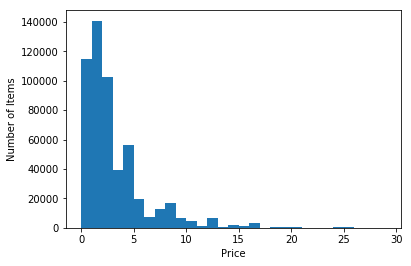

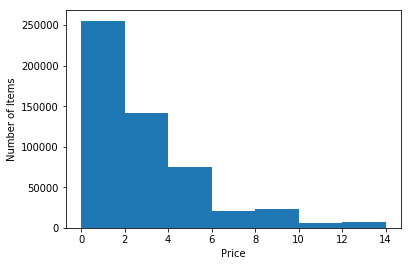

In [7]:
#2 Identify clusters of purchased items by price range


#Preparing dataframe for question 2 
q1_price_data = retail_landing_df[['StockCode','UnitPrice','Description']]

# Finding out the quantity vs number of items which fall in that category
q1_price_data_agg = q1_price_data.drop_duplicates()#groupby(['StockCode','Description','UnitPrice']).
q1_price_data_agg_prices = list(q1_price_data['UnitPrice'])


# top 10 items 
# Purpose : To get top 10 Items by price
# Input : A dataframe consisiting of two columns , Stock Code and Quantity
# Ouptut: Top 10 products by quantity 

def getTop10ByPrice(df, ascending=True):
    q1_quant_data_agg_topk = df.sort_values(['UnitPrice'],ascending=ascending).head(10)
    return q1_quant_data_agg_topk


# getting top 10 priced items
print("Top 10 Priced Items")
print("\n")
top_k_price = getTop10ByPrice(q1_price_data_agg,ascending=False)
print(top_k_price.head(10))

print("\n")
print("\n")

# getting top 10 least priced items
print("10 Least priced items")
print("\n")
least_k_price = getTop10ByPrice(q1_price_data_agg)
print(least_k_price.head(10))

# plotting the values
bins = range(0,30)
plt.hist(q1_price_data_agg_prices, bins=bins)
plt.xlabel("Price")
plt.ylabel("Number of Items")
plt.show()

# A more detailed view  by avoiding values after 15 since they are few in number

bins = range(0,15,2)
plt.hist(q1_price_data_agg_prices, bins=bins)
plt.xlabel("Price")
plt.ylabel("Number of Items")
plt.show()



In [8]:
# storing different countries in the dataset for Question 4,5,6,7

country_df = retail_landing_df[['Country']].drop_duplicates()
country_list = list(country_df['Country'])

print(country_list)


['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria', 'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community', 'Malta', 'RSA']


In [9]:
# Question 4,5 
# Top Purchase Items based on country 
for country in country_list:
    item_df = retail_landing_df[(retail_landing_df.Country == country)]
    top_10_items_quant_df = getTop10ByQuantity(item_df[['StockCode','Quantity','Description']],ascending=False)
    top_10_items_price_df = getTop10ByPrice(item_df[['StockCode','UnitPrice','Description']],ascending=False)
    bottom_10_items_quant_df = getTop10ByQuantity(item_df[['StockCode','Quantity','Description']])
    bottom_10_items_price_df = getTop10ByPrice(item_df[['StockCode','UnitPrice','Description']])
    print("Top 10 Items Purchased by customers in {0}".format(country))
    print(top_10_items_quant_df.to_string(index=False))
    print("\n")
    print("10 Items Least Purchased / Cancelled Items by customers in {0}".format(country))
    print(bottom_10_items_quant_df.to_string(index=False))
    print("\n")
    print("Top 10 Items By Price in {0}".format(country))
    print(top_10_items_price_df.to_string(index=False))
    print("\n")
    print("10 Least Priced Items / Cancelled Items in {0}".format(country))
    print(bottom_10_items_price_df.to_string(index=False))
    print("\n\n")

    
    
    

Top 10 Items Purchased by customers in United Kingdom
StockCode  Quantity                          Description
   23843     80995          PAPER CRAFT , LITTLE BIRDIE
   23166     74215       MEDIUM CERAMIC TOP STORAGE JAR
   84826     12540       ASSTD DESIGN 3D PAPER STICKERS
   37413      5568                                  NaN
   84077      4800    WORLD WAR 2 GLIDERS ASSTD DESIGNS
   22197      4300                 SMALL POPCORN HOLDER
  85123A      4000                                    ?
   22053      3906                EMPIRE DESIGN ROSETTE
   18007      3186  ESSENTIAL BALM 3.5g TIN IN ENVELOPE
   21108      3114   FAIRY CAKE FLANNEL ASSORTED COLOUR


10 Items Least Purchased / Cancelled Items by customers in United Kingdom
StockCode  Quantity                          Description
   23843    -80995          PAPER CRAFT , LITTLE BIRDIE
   23166    -74215       MEDIUM CERAMIC TOP STORAGE JAR
   23005     -9600         printing smudges/thrown away
   23005     -9600         p

Top 10 Items Purchased by customers in EIRE
StockCode  Quantity                        Description
  17084R      1440              ASSORTED INCENSE PACK
   84212       960      ASSORTED FLOWER COLOUR "LEIS"
   22266       640    EASTER DECORATION HANGING BUNNY
   22197       500                     POPCORN HOLDER
   22950       432       36 DOILIES VINTAGE CHRISTMAS
   22151       432          PLACE SETTING WHITE HEART
   22666       408    RECIPE BOX PANTRY YELLOW DESIGN
   22667       408              RECIPE BOX RETROSPOT 
   22197       400               SMALL POPCORN HOLDER
   21292       384  SMALL STRIPES CHOCOLATE GIFT BAG


10 Items Least Purchased / Cancelled Items by customers in EIRE
StockCode  Quantity                          Description
   22950      -288         36 DOILIES VINTAGE CHRISTMAS
   22952      -240      60 CAKE CASES VINTAGE CHRISTMAS
   23157      -240           SET OF 6 NATIVITY MAGNETS 
   22910      -200    PAPER CHAIN KIT VINTAGE CHRISTMAS
   22630      -

Top 10 Items By Price in Poland
StockCode  UnitPrice                          Description
    POST      40.00                              POSTAGE
    POST      40.00                              POSTAGE
    POST      40.00                              POSTAGE
    POST      40.00                              POSTAGE
    POST      40.00                              POSTAGE
  84078A      39.95     SET/4 WHITE RETRO STORAGE CUBES 
   22761      24.95           CHEST 7 DRAWER MA CAMPAGNE
   21277      21.95  FRENCH STYLE EMBOSSED HEART CABINET
   22847      16.95          BREAD BIN DINER STYLE IVORY
   22762      14.95        CUPBOARD 3 DRAWER MA CAMPAGNE


10 Least Priced Items / Cancelled Items in Poland
StockCode  UnitPrice                          Description
   85094       0.19         CANDY SPOT EGG WARMER RABBIT
   35953       0.39   FOLKART STAR CHRISTMAS DECORATIONS
   22340       0.39           NOEL GARLAND PAINTED ZINC 
   22065       0.39       CHRISTMAS PUDDING TRINKET POT 
  

StockCode  Quantity                         Description
   22271        48                FELTCRAFT DOLL ROSIE
   22306        36  SILVER MUG BONE CHINA TREE OF LIFE
   21915        36              RED  HARMONICA IN BOX 
   22307        36    GOLD MUG BONE CHINA TREE OF LIFE
   21914        36              BLUE HARMONICA IN BOX 
   22145        30     CHRISTMAS CRAFT HEART STOCKING 
   22568        24               FELTCRAFT CUSHION OWL
  85206A        24        CREAM FELT EASTER EGG BASKET
   22021        24         BLUE FELT EASTER EGG BASKET
   22554        24    PLASTERS IN TIN WOODLAND ANIMALS


10 Items Least Purchased / Cancelled Items by customers in Lithuania
StockCode  Quantity                        Description
   20686         6  DOLLY MIXTURE CHILDREN'S UMBRELLA
   20682         6   RED RETROSPOT CHILDRENS UMBRELLA
   20681         6   PINK POLKADOT CHILDRENS UMBRELLA
   22569         8        FELTCRAFT CUSHION BUTTERFLY
   21429         8     RED GINGHAM ROSE JEWELLERY BO

Top 10 Items Purchased by customers in Denmark
StockCode  Quantity                         Description
   23295       256    SET OF 12 MINI LOAF BAKING CASES
   23296       256      SET OF 6 TEA TIME BAKING CASES
   21915       240              RED  HARMONICA IN BOX 
   22693       144  GROW A FLYTRAP OR SUNFLOWER IN TIN
   22467       144                   GUMBALL COAT RACK
   22951       120     60 CAKE CASES DOLLY GIRL DESIGN
   22383       100              LUNCH BAG SUKI DESIGN 
   23201       100                  JUMBO BAG ALPHABET
   20713       100                      JUMBO BAG OWLS
   22865        96              HAND WARMER OWL DESIGN


10 Items Least Purchased / Cancelled Items by customers in Denmark
StockCode  Quantity                      Description
  16169E       -25             WRAP 50'S  CHRISTMAS
   23511        -5   EMBROIDERED RIBBON REEL EMILY 
   22848        -4       BREAD BIN DINER STYLE PINK
   22846        -4       BREAD BIN DINER STYLE RED 
   21731        -




Top 10 Items Purchased by customers in Bahrain
StockCode  Quantity                         Description
   23076        96          ICE CREAM SUNDAE LIP GLOSS
   23077        60                 DOUGHNUT LIP GLOSS 
  72802B        54  OCEAN SCENT CANDLE IN JEWELLED BOX
   22693        24  GROW A FLYTRAP OR SUNFLOWER IN TIN
  85040A        12     S/4 PINK FLOWER CANDLES IN BOWL
   37446         8  MINI CAKE STAND WITH HANGING CAKES
   22649         8        STRAWBERRY FAIRY CAKE TEAPOT
   22698         6      PINK REGENCY TEACUP AND SAUCER
  72802C         6   VANILLA SCENT CANDLE JEWELLED BOX
  72802B         6  OCEAN SCENT CANDLE IN JEWELLED BOX


10 Items Least Purchased / Cancelled Items by customers in Bahrain
StockCode  Quantity                         Description
  72802B       -54  OCEAN SCENT CANDLE IN JEWELLED BOX
   37449         2  CERAMIC CAKE STAND + HANGING CAKES
   22890         2  NOVELTY BISCUITS CAKE STAND 3 TIER
   22423         2            REGENCY CAKESTAND 3 TIER

Top 10 Items Purchased by customers in Saudi Arabia
StockCode  Quantity                        Description
   22915        12      ASSORTED BOTTLE TOP  MAGNETS 
   22553        12             PLASTERS IN TIN SKULLS
   22555        12          PLASTERS IN TIN STRONGMAN
   22556        12     PLASTERS IN TIN CIRCUS PARADE 
   22969        12       HOMEMADE JAM SCENTED CANDLES
   22363         6               GLASS JAR MARMALADE 
   22362         6       GLASS JAR PEACOCK BATH SALTS
   22361         6  GLASS JAR DAISY FRESH COTTON WOOL
   20781         2           GOLD EAR MUFF HEADPHONES
   22361        -5  GLASS JAR DAISY FRESH COTTON WOOL


10 Items Least Purchased / Cancelled Items by customers in Saudi Arabia
StockCode  Quantity                        Description
   22361        -5  GLASS JAR DAISY FRESH COTTON WOOL
   20781         2           GOLD EAR MUFF HEADPHONES
   22363         6               GLASS JAR MARMALADE 
   22362         6       GLASS JAR PEACOCK BATH SALTS
   22361


10 Least Priced Items / Cancelled Items in European Community
StockCode  UnitPrice                          Description
   23307       0.55  SET OF 60 PANTRY DESIGN CAKE CASES 
   23308       0.55   SET OF 60 VINTAGE LEAF CAKE CASES 
   22319       0.65    HAIRCLIPS FORTIES FABRIC ASSORTED
   22571       0.85         ROCKING HORSE RED CHRISTMAS 
   22572       0.85       ROCKING HORSE GREEN CHRISTMAS 
   21677       0.85                     HEARTS  STICKERS
   21676       0.85                    FLOWERS  STICKERS
   21675       0.85                 BUTTERFLIES STICKERS
   21098       1.25                CHRISTMAS TOILET ROLL
   23211       1.25       RED ROCKING HORSE HAND PAINTED



Top 10 Items Purchased by customers in Malta
StockCode  Quantity                       Description
   22065        48    CHRISTMAS PUDDING TRINKET POT 
   72741        45             GRAND CHOCOLATECANDLE
   22959        25            WRAP CHRISTMAS VILLAGE
  85034C        24       3 ROSE MORRIS BOXED CAN

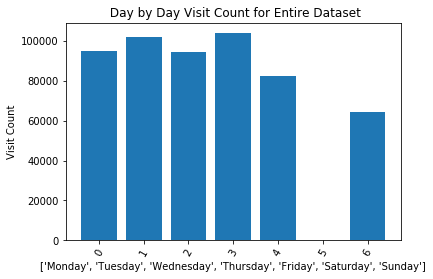

In [10]:
# 7 Identify Busiest Day of the week

day_week_map = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# function to find number of customers visiting each day
def findBusiestDay(df):
    ts_list = pd.to_datetime(df['InvoiceDate']).apply(lambda x: x.date())
    ts_list_tup = [tuple(str(x).split('-')) for x in ts_list]
    weekday_list = [day_week_map.get(dt.date(int(x[0]),int(x[1]),int(x[2])).weekday(),'Unknown') for x in ts_list_tup]
    day_freq_map = {}
    for day in weekday_list:
        day_freq_map[day] = day_freq_map.get(day,0)+1
    return day_freq_map
    
# calling weekday fuction to find busiest day of the week 
day_freq_map = findBusiestDay(retail_landing_df)
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
freqs=[]
for day in days:
    freqs.append(day_freq_map.get(day,0))
    
#fig, ax = plt.subplots(1,1)
day_ticks = range(0,7)
day_lables = days
plt.bar(day_ticks,freqs)
plt.xlabel("Day")
plt.ylabel("Visit Count")
plt.title(" Day by Day Visit Count for Entire Dataset")
plt.xticks(day_ticks, rotation=60)
plt.xlabel(day_lables)
plt.show()



    

    

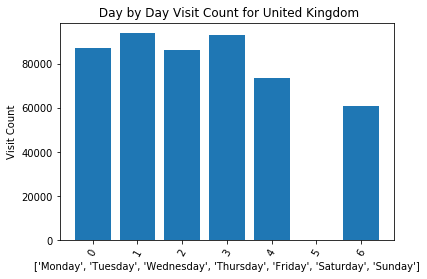

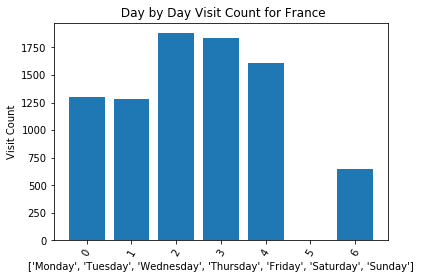

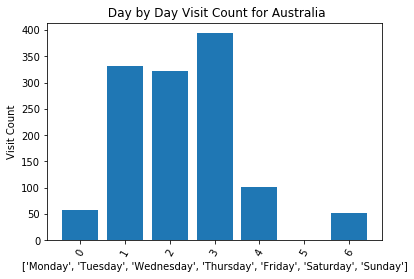

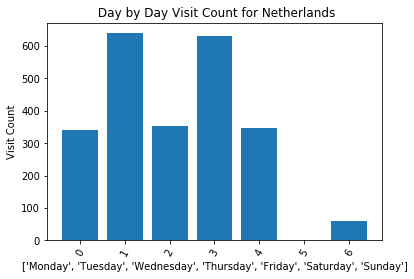

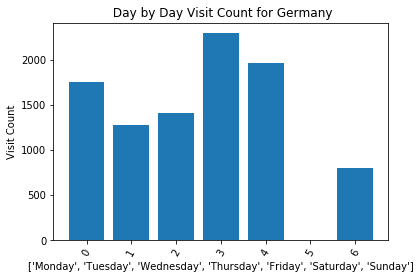

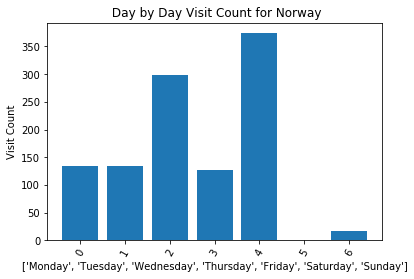

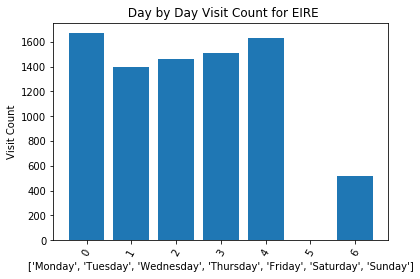

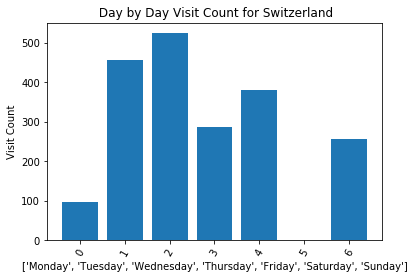

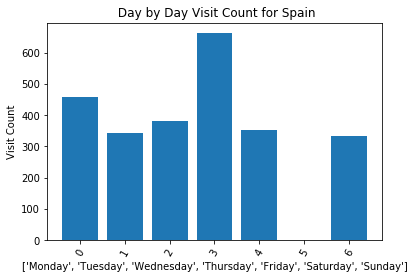

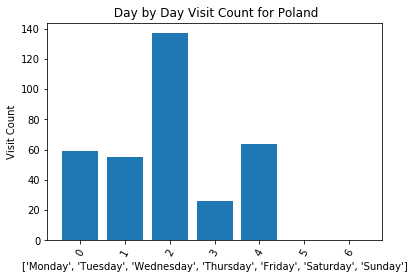

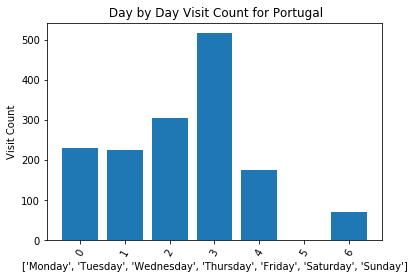

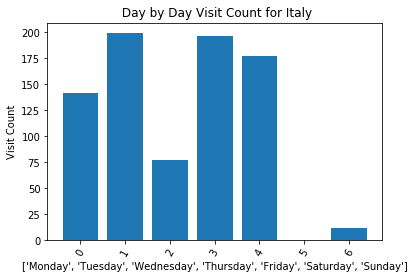

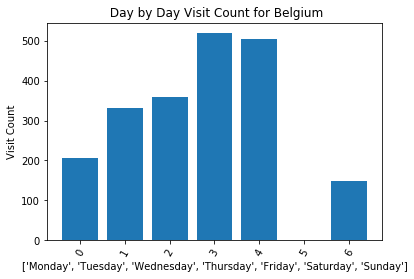

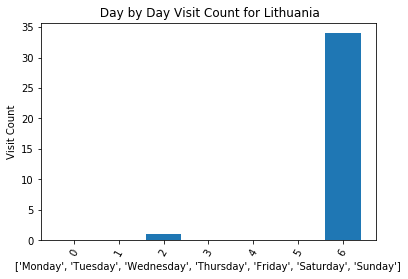

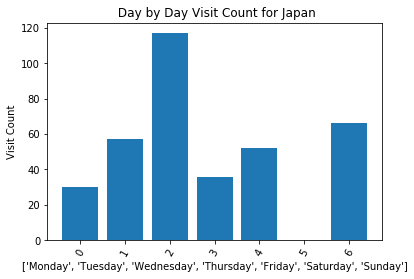

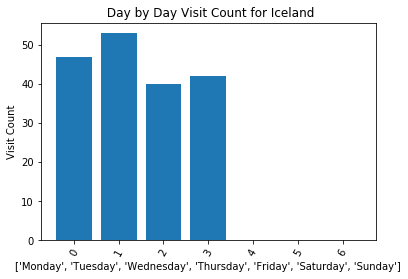

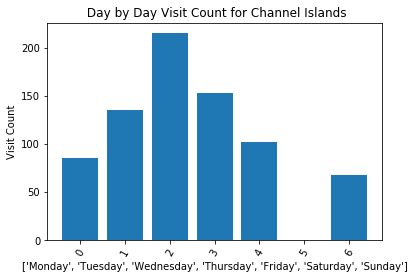

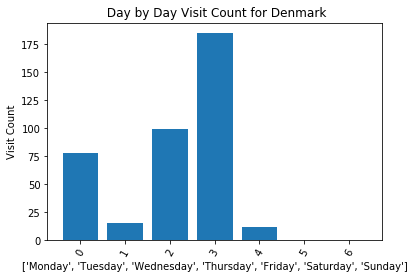

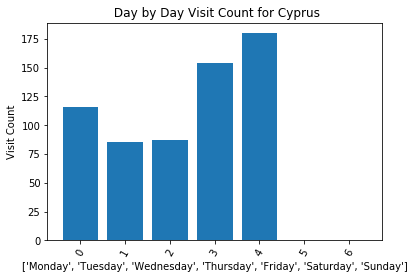

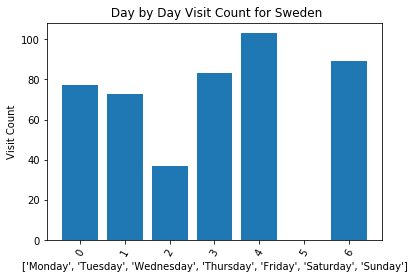

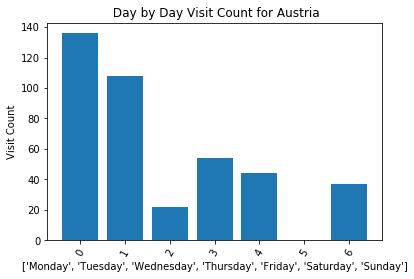

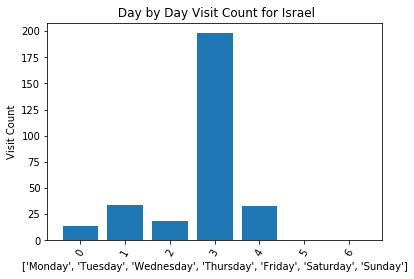

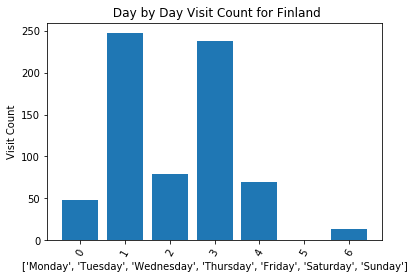

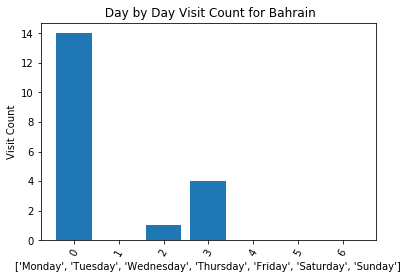

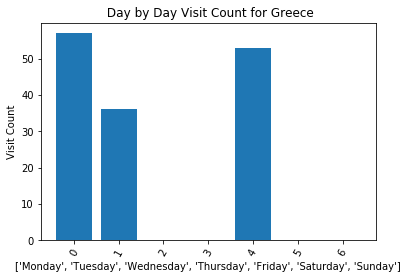

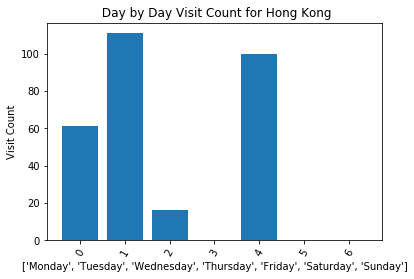

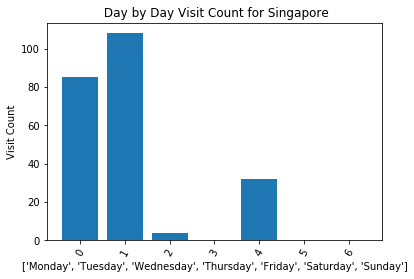

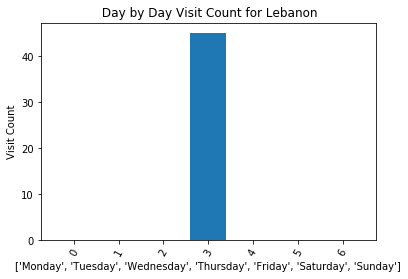

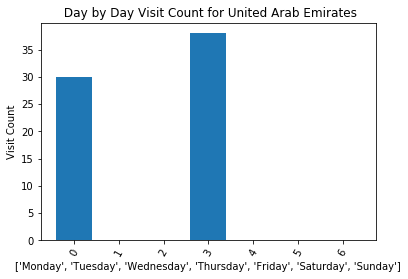

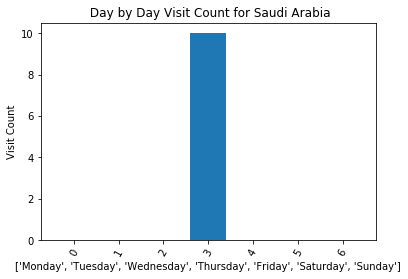

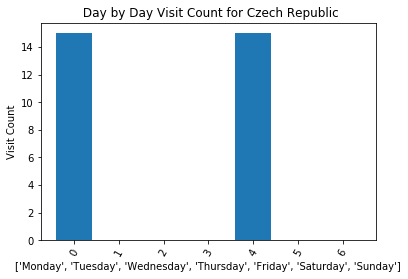

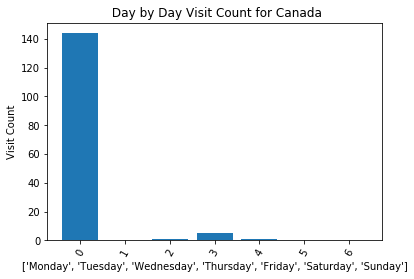

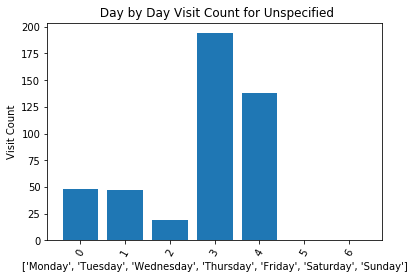

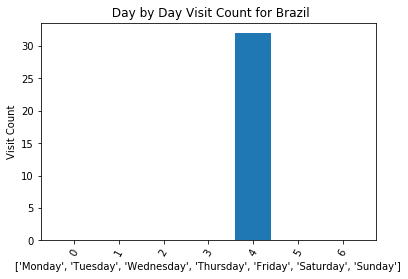

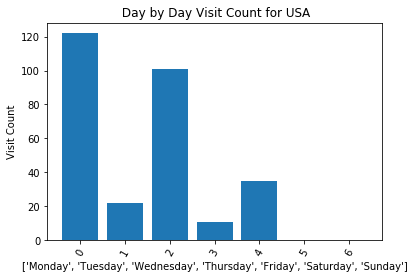

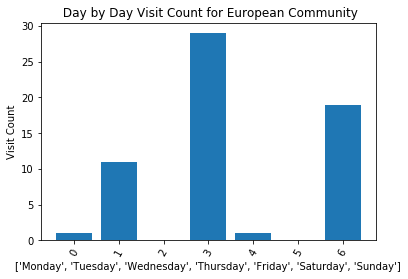

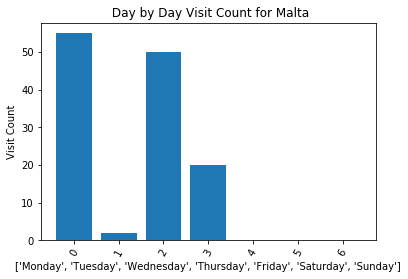

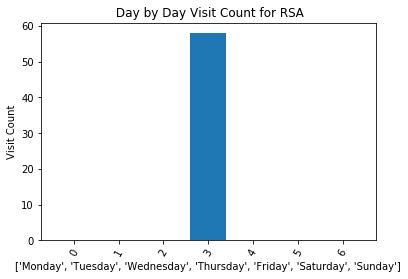

In [11]:
# Busy Days by country

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for country in country_list:
    item_df = retail_landing_df[(retail_landing_df.Country == country)]
    day_freq_map = findBusiestDay(item_df)
    
    freqs=[]
    for day in days:
        freqs.append(day_freq_map.get(day,0))
    
    #fig, ax = plt.subplots(1,1)
    day_ticks = range(0,7)
    day_lables = days
    plt.bar(day_ticks,freqs)
    plt.xlabel("Day")
    plt.ylabel("Visit Count")
    plt.title(" Day by Day Visit Count for " + country)
    plt.xticks(day_ticks, rotation=60)
    plt.xlabel(day_lables)
    plt.show()

    
    

## Implementing CLustering Algorithms on dataset  : K-means and Agglomerative 

### K-means Clustering 

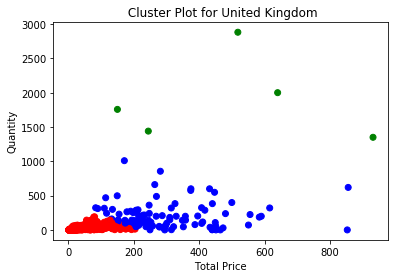

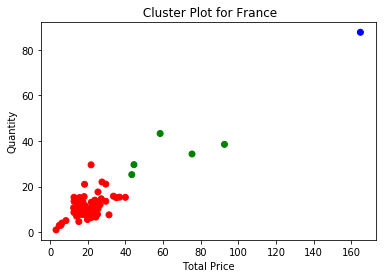

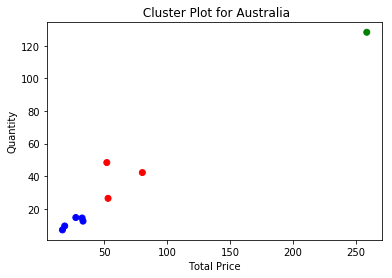

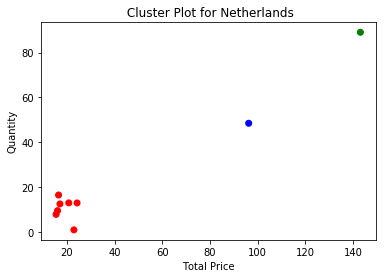

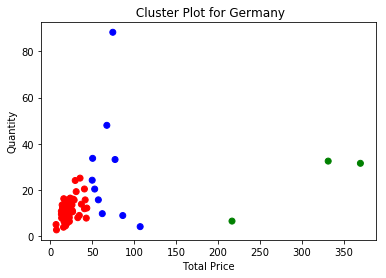

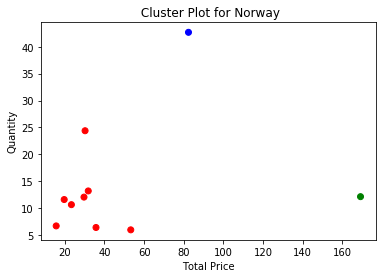

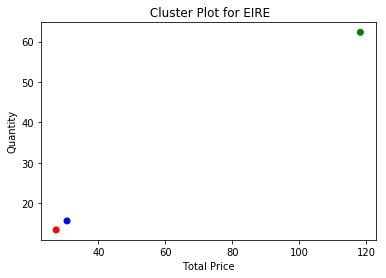

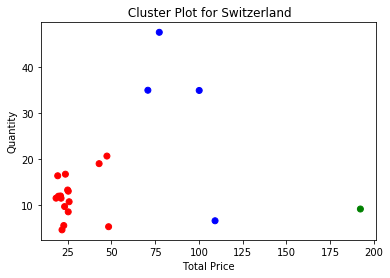

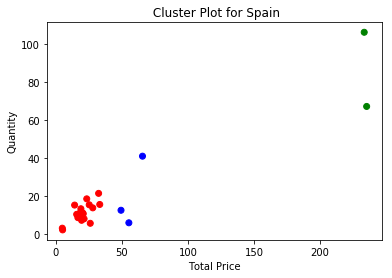

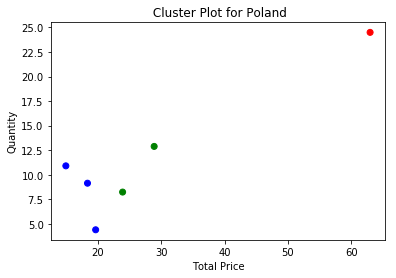

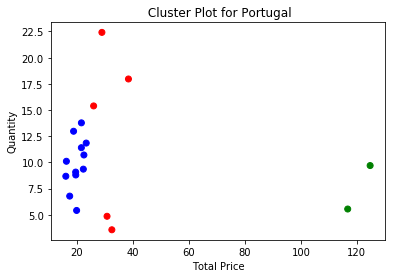

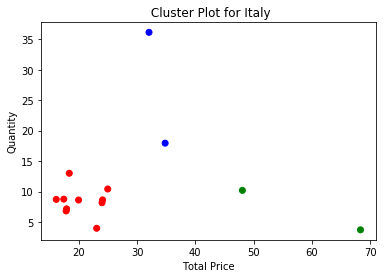

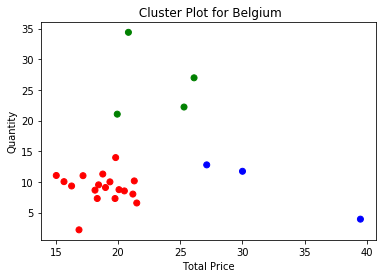

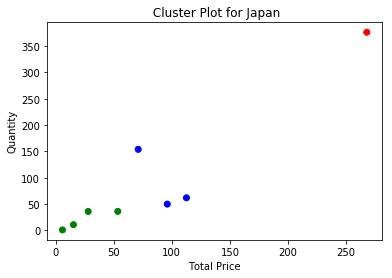

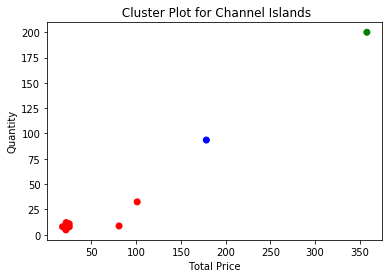

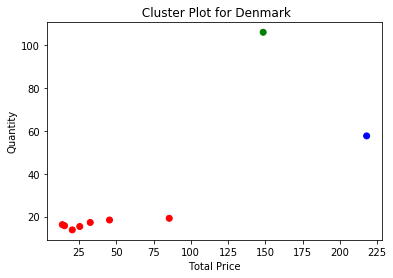

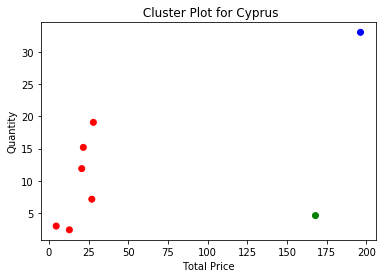

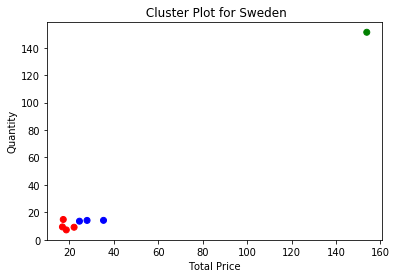

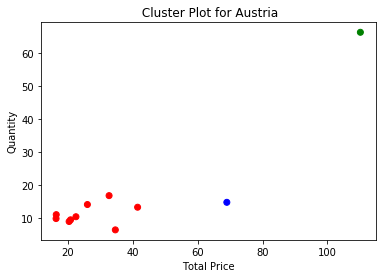

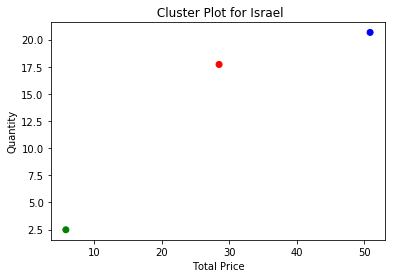

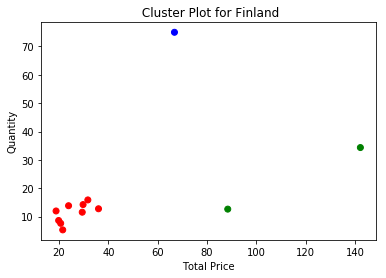

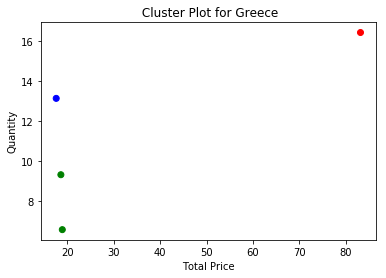

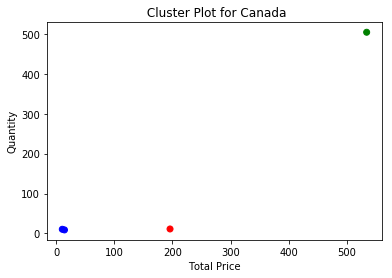

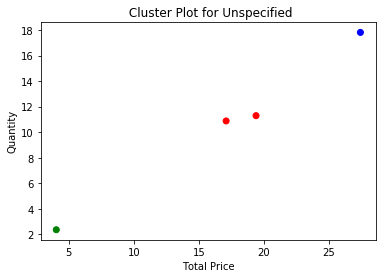

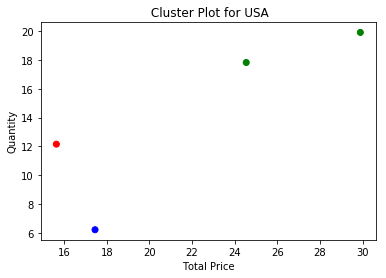

In [12]:
# Clustering based on each country 

# Filtering dataset by country

def getByCountry(df, country):
    return df[(df.Country==country) & (df.TotalPrice > 0) & (df.TotalPrice < 1000)]

for country in country_list:
    
    country_df = getByCountry(retail_landing_df, country)
    if(country_df.shape[0]<10):
        continue;

    #calculating avg quantity per invoice per customer
    avg_quant_per_inv = country_df.groupby(['CustomerID','InvoiceNo'])['Quantity'].mean().to_frame().reset_index()
    avg_quant_per_id = avg_quant_per_inv.groupby(['CustomerID'])['Quantity'].mean().to_frame().reset_index()

    #calculating avg price per invoice per customer
    avg_price_per_inv = country_df.groupby(['CustomerID','InvoiceNo'])['TotalPrice'].mean().to_frame().reset_index()
    avg_price_per_id = avg_price_per_inv.groupby(['CustomerID'])['TotalPrice'].mean().to_frame().reset_index()

    # setting number of clusters . We have tried different cluster numbers and found that 3 is optimal numbers
    number_of_clusters = 3
    cluster_df = pd.merge(avg_quant_per_id,avg_price_per_id)
    if(cluster_df.shape[0] < number_of_clusters):
        continue;
    
    # using k-means algorithm from scikit learn
    kmeans = KMeans(n_clusters=number_of_clusters)
    kmeans.fit(cluster_df[['TotalPrice','Quantity']])
    # storing cluster numbers
    labels = kmeans.labels_
    # list of colors. used to assign colors to cluster labels
    colors_list=['r','g','b','y','m','c','k']
    # assigning colors to cluster labels
    color_cluster = [colors_list[x] for x in labels]
    
    # Generating Cluster plot 
    plt.title(" Cluster Plot for " + country)
    plt.xlabel("Total Price")
    plt.ylabel("Quantity")
    plt.scatter(cluster_df['TotalPrice'],cluster_df['Quantity'],color=color_cluster)
    plt.show()
    
    

### Agglomorative Clustering 

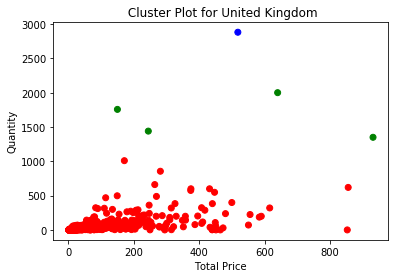

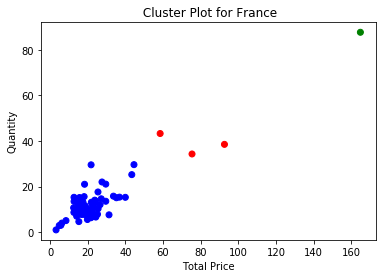

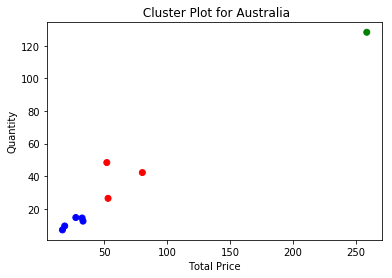

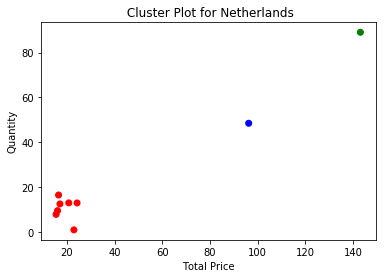

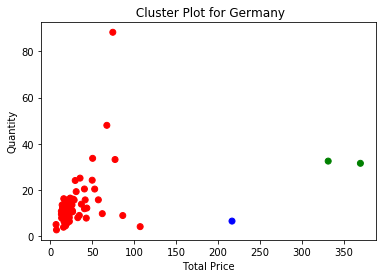

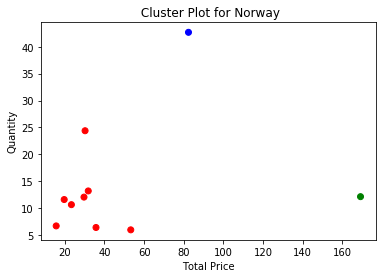

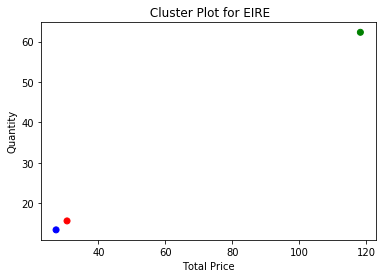

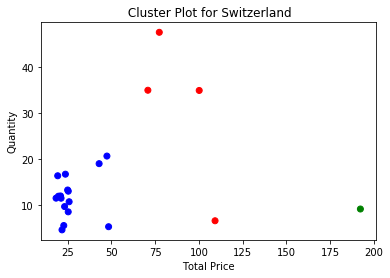

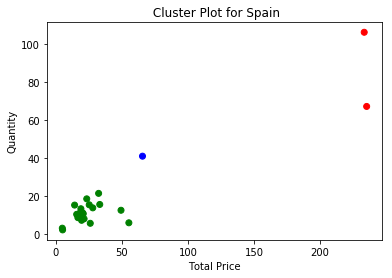

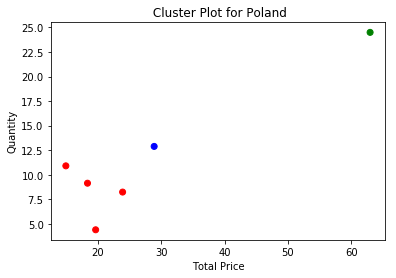

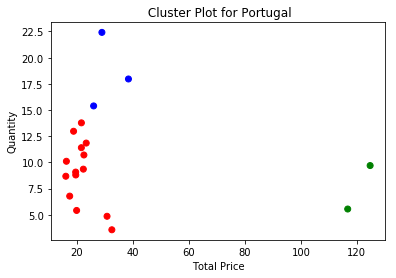

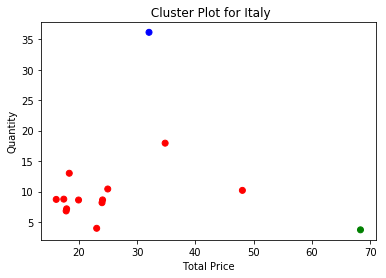

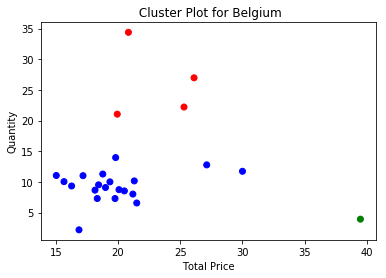

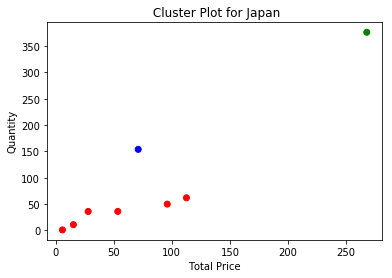

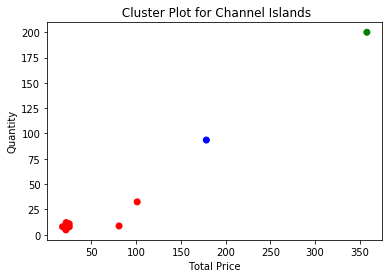

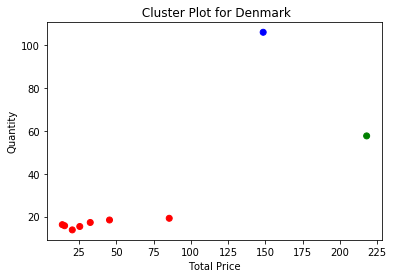

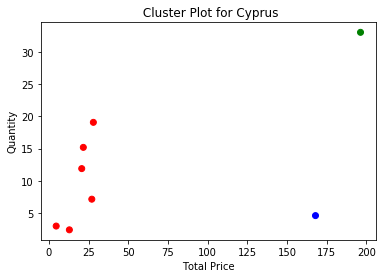

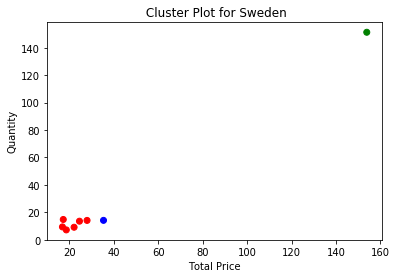

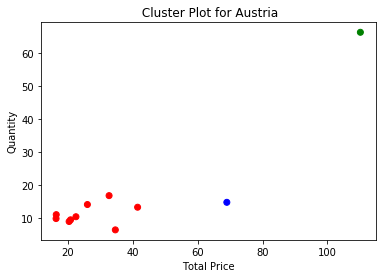

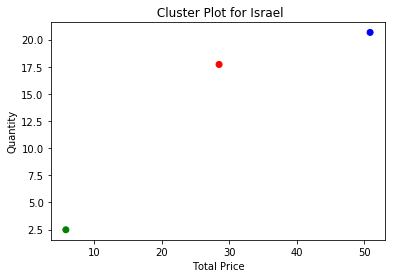

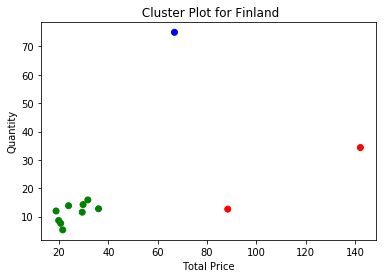

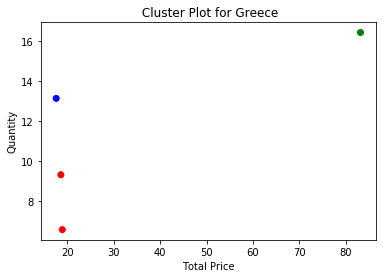

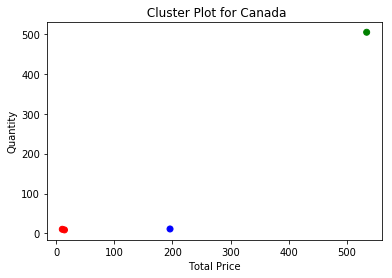

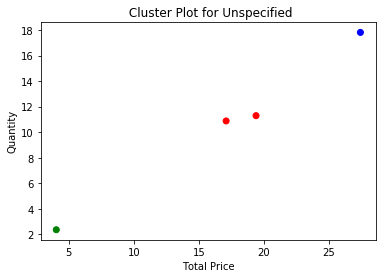

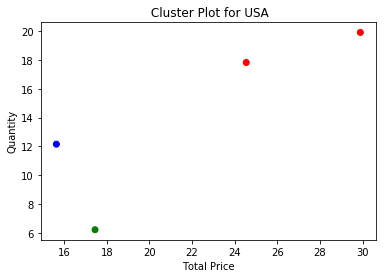

In [13]:
# Agglomerative clustering 

for country in country_list:
    
    country_df = getByCountry(retail_landing_df, country)
    if(country_df.shape[0]<10):
        continue;

    #calculating avg quantity per invoice per customer
    avg_quant_per_inv = country_df.groupby(['CustomerID','InvoiceNo'])['Quantity'].mean().to_frame().reset_index()
    avg_quant_per_id = avg_quant_per_inv.groupby(['CustomerID'])['Quantity'].mean().to_frame().reset_index()

    #calculating avg price per invoice per customer
    avg_price_per_inv = country_df.groupby(['CustomerID','InvoiceNo'])['TotalPrice'].mean().to_frame().reset_index()
    avg_price_per_id = avg_price_per_inv.groupby(['CustomerID'])['TotalPrice'].mean().to_frame().reset_index()

    # setting number of clusters . We have tried different cluster numbers and found that 3 is optimal numbers
    number_of_clusters = 3
    cluster_df = pd.merge(avg_quant_per_id,avg_price_per_id)
    if(cluster_df.shape[0] < number_of_clusters):
        continue;
    
    # using k-means algorithm from scikit learn
    agglo = AgglomerativeClustering(n_clusters=number_of_clusters, linkage='average')
    agglo.fit(cluster_df[['TotalPrice','Quantity']])
    # storing cluster numbers
    labels = agglo.labels_
    # list of colors. used to assign colors to cluster labels
    colors_list=['r','g','b','y','m','c','k']
    # assigning colors to cluster labels
    color_cluster = [colors_list[x] for x in labels]
    
    # Generating Cluster plot 
    plt.title(" Cluster Plot for " + country)
    plt.xlabel("Total Price")
    plt.ylabel("Quantity")
    plt.scatter(cluster_df['TotalPrice'],cluster_df['Quantity'],color=color_cluster)
    plt.show()
    
    